In [61]:
from typing import Union
import random
'''
    Problem: Mario needs to get to bowsers castle
    Mario can move forward by doing a jump, double jump, or long jump k = [1,2,3]
    He must avoid the obstacles and collect the coins along the path, p
    p has a time constraint added by p = [-n, -(n-1), -(n-2), ... -3, -2, -1, 0]
    If there is a coin, the cell block becomes + n*10
    If there is a trap, the cell block becomes - n*10
    
    Help Mario find the best path to bowsers castle
    
    1. Objective function
        F(i) = the max path score to get to bowsers castle avoiding obstacles and getting coins along the way
    2. Base case
    
    F(0) = 0
    F(1) = p[1]
    F(2) = p[2]
    F(3) = p[3]
    
    F(end) = min(F(end-1), F(end-2), F(end-3))) + p(end)
    
    3. Recurrence relationship
        F(n) = min(F(n-1), F(n-2), F(n-3))) + p(n)
        
    4. What is the order of execution
        bottom up
    5. Where is the answer
        f(n)
'''

# time complexity O(n)
# space complexity O(n)
def play_level(level: list) ->  Union[int, list]:
    level_amount = len(level)
    dp = [0] * level_amount
    dp[0] = level[0]
    dp[1] = level[1]
    dp[2] = level[2]
    path = [0] * level_amount
    for i in range(3, level_amount):
        dp[i] = max(dp[i-1], dp[i-2], dp[i-3]) + level[i]
        
        if dp[i-1] > dp[i-2] and dp[i-1] > dp[i-3]:
            path[i] = i - 1
        elif dp[i-2] > dp[i-1] and dp[i-2] > dp[i-3]:
            path[i] = i - 2
        else:
            path[i] = i - 3
        
    best_path = []
    cur = i
    while cur > 0:
        best_path.append(cur)
        cur = path[cur]
    best_path.append(0)

    return dp[-1], best_path[::-1]

def generate_level(level_size, coin_amount, trap_amount):
    level = list(range(-level_size, 0, 1))
    level = add_coins(level, coin_amount)
    level = add_traps(level, trap_amount)
    return level

def add_coins(level, coin_amount):
    '''adds values'''
    n = len(level)
    coins = random.sample(range(1, n), coin_amount)
    for coin in coins:
        level[coin] += n*10
    return level

def add_traps(level, trap_amount):
    '''Subtracts values'''
    n = len(level)
    traps = random.sample(range(1, n), trap_amount)
    for trap in traps:
        level[trap] -= n*10
    return level


level_size = 10
coin_amount = 3
trap_amount = 4

level = generate_level(level_size, coin_amount, trap_amount)
results = play_level(level)
print('map', level)
print()
print('score', results[0])
print()
print('path', results[1])

map [-10, -9, -8, -7, -6, -5, -4, -3, -2, -101]

score -116

path [0, 2, 5, 8, 9]


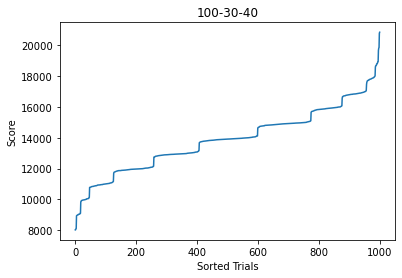

mean =  13872.964


In [67]:
import matplotlib.pyplot as plt
level_size = 100
coin_amount = 30
trap_amount = 40
trial_amount = 1000
trials = []
for trial in range(trial_amount):
    level = generate_level(level_size, coin_amount, trap_amount)
    trials.append(play_level(level)[0])
    

trials.sort()

plt.plot(trials)
plt.title(f'{level_size}-{coin_amount}-{trap_amount}')
plt.xlabel('Sorted Trials')
plt.ylabel('Score',)
plt.show()
print('mean = ', sum(trials)/len(trials))

# Mario kart simulation

8 contestants are racing each other on the racetrack. See what canidate is the most likely to win under different starting conditions and random chance occurances. Along the way traps should be avoided and items can be picked up.

Each contestant has a weight, acceleration and max speed.
- weight affects collisions, heavier carts do not move, but lighter carts get bumped and slowed down.
- acceleration allows a cart to get to its top speed faster
- max speed is capped unless certain items are used

Each level has 3 lanes, and are weighted as if there is a natural curve forming a loop. The left lane is favored the most decreasing as you go to the right. The out of bounds lanes, one left or right of the leftmost or rightmost lane is negatively favored.

movement
- a cart can move forward, forword + left, or forward + right with a slight penalty for lateral movement


